In [2]:
!pip install numpy==1.16.1

    100% |████████████████████████████████| 17.3MB 2.3MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [1]:
!pip install pandas==0.24.1

    100% |████████████████████████████████| 10.1MB 4.4MB/s 
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Lectura de los datos

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = {}
for year in range(1995, 2016):
    df[str(year)] = pd.read_excel(f'/content/gdrive/My Drive/datos/ArchivoPrecios/Precio_Bolsa_Nacional_($kwh)_{year}.xlsx')
    

for year in range(2016, 2019):
    df[str(year)] = pd.read_excel(f'/content/gdrive/My Drive/datos/ArchivoPrecios/Precio_Bolsa_Nacional_($kwh)_{year}.xls')



In [0]:
def limpieza(df, year):
    df_t = df.copy()
    
    df_t.columns = [f'col{i}' for i in range(len(df_t.columns))]

    columna = np.squeeze(df_t.loc[df_t[df_t.columns[0]] == 'Fecha'].values)
    indice = int(df_t.loc[df_t[df_t.columns[0]] == 'Fecha'].index.values) + 1
    df_t.columns = columna 
    df_t = df_t.drop(list(range(0, indice)))
    df_t = df_t.drop_duplicates()
    return df_t
  
def promedio(param):
    df_t = pd.DataFrame()
    df_t['Fecha'] = param['Fecha']
    df_t['mean'] = param.mean(axis=1)
    return df_t


In [0]:
for year in range(1995, 2019):
    year = str(year)
    df[year] = limpieza(df[year], year)
    df[year] = promedio(df[year])

In [0]:
years = sorted(list(df))
df_concat = pd.concat([df[year] for year in years], axis=0)
df_concat = df_concat.dropna()
print(df_concat)



          Fecha        mean
3    1995-07-20    1.409435
4    1995-07-21    4.924333
5    1995-07-22    1.269500
6    1995-07-23    0.953083
7    1995-07-24    4.305917
8    1995-07-25    1.149167
9    1995-07-26    1.108625
10   1995-07-27    0.585958
11   1995-07-28    0.499792
12   1995-07-29    0.927667
13   1995-07-30    0.669458
14   1995-07-31    0.679458
15   1995-08-01    1.106917
16   1995-08-02    1.077500
17   1995-08-03    1.517917
18   1995-08-04    1.786042
19   1995-08-05    2.383792
20   1995-08-06    2.387583
21   1995-08-07    3.707208
22   1995-08-08    6.650000
23   1995-08-09   13.991958
24   1995-08-10   20.041667
25   1995-08-11   21.191667
26   1995-08-12   30.710750
27   1995-08-13   34.327833
28   1995-08-14   33.190250
29   1995-08-15   14.513250
30   1995-08-16    8.664333
31   1995-08-17    1.813250
32   1995-08-18    1.941667
..          ...         ...
97   2018-04-06  111.339311
98   2018-04-07  119.192362
99   2018-04-08  101.975172
100  2018-04-09  108

In [0]:
def plot(X, ext=''):
    plt.xlabel('dias')
    plt.ylabel('kWh')
    plt.title('Precio_Bolsa_Nacional ($kwh)' + ext)
    plt.plot(X, color='black')
    plt.show();

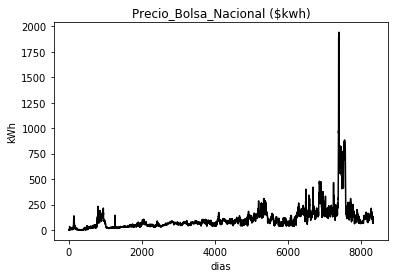

In [0]:
plot(df_concat['mean'].values)

**transformacion**

In [0]:
td = np.cbrt(df_concat['mean'].values.reshape(-1, 1))


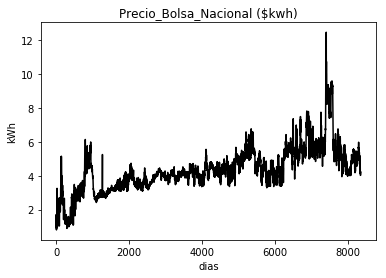

In [0]:
plot(td)

#ADALINE

In [0]:

precal = td[0:100]
precal = precal.reshape(-1)
entrena = td[100:]

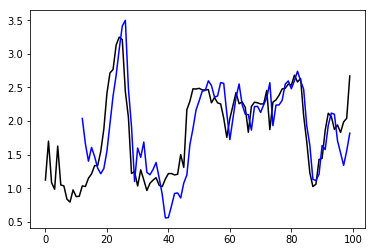

In [0]:

L = 12
mu = 0.007
w = np.array(0.1 * np.random.standard_normal(L+1))

y_pred = np.empty(len(precal))
y_pred[:] = np.nan

for i in range(4):
    for t in range(L, len(precal)):
        ## entrada al ADALINE
        x = np.concatenate([[1], precal[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = precal[t] - y_pred[t]
        w = w + 2 * mu * e * x


plt.plot(precal, color='black');
plt.plot(y_pred, color = 'blue');


### Entrenamiento

In [0]:
y = entrena.reshape(-1)
ss = len(y)
y_pred = np.empty(ss)
y_pred[:] = np.nan

mu = 0.0007

for i in range(4):
    for t in range(L, ss):
        ## entrada al ADALINE
        x = np.concatenate([[1], y[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = y[t] - y_pred[t]
        w = w + 2 * mu * e * x



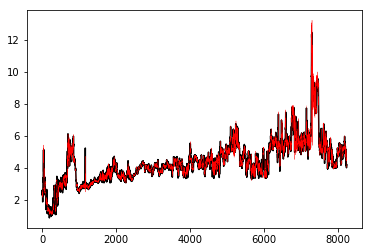

In [0]:
def plot2(y, pred):
  plt.plot(y, color='black')
  plt.plot(y_pred, color='red',linewidth=0.3)
  plt.show();
    
plot2(y,y_pred)

**Pronóstico 7 dias**

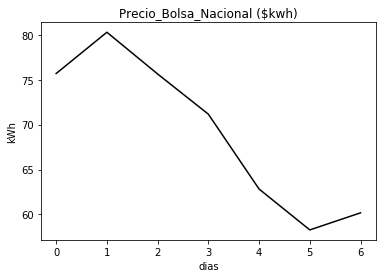

In [0]:
def model_pre(y, w):  
    x = np.concatenate([[1], y])
    y_pred = np.dot(w, x)
    return y_pred

prediction = list(y[len(y) - L:])
for i in range(7):
    prediction.append(model_pre(prediction[i:], w))


p = np.power((np.array(prediction).reshape(-1, 1)),3)
plot(p[L:])

**Parámetros Óptimos**

In [0]:
def sse_score_model(L, mu, pre, training):       
    y_pred = np.empty(len(pre))
    y_pred[:] = np.nan
    
    w = np.array(0.1 * np.random.standard_normal(L+1))
    for i in range(4):
        for t in range(L, len(pre)):
            ## entrada al ADALINE
            x = np.concatenate([[1], pre[t-L:t]])
            ## algoritmo de aprendizaje
            y_pred[t] = np.dot(w, x)
            e = pre[t] - y_pred[t]
            w = w + 2 * mu * e * x
                   
    SSE = []
    d = entrena.reshape(-1)
    
    y_pred = np.empty(len(d))
    y_pred[:] = np.nan
    
    for i in range(4):
        _sse = 0
        for t in range(L, len(d)):
            ## entrada al ADALINE
            x = np.concatenate([[1], d[t-L:t]])
            y_pred[t] = np.dot(w, x)

            ## algoritmo de aprendizaje
            e = d[t] - y_pred[t]
            
            _sse += e ** 2
            w = w + 2 * mu * e * x

        SSE.append(_sse)
        
    return SSE[-1]
  
def busqueda(learning_rate, L, precal, entrena):
    score_mse = []    
    for mu in learning_rate:
        for l in L:
            result = sse_score_model(l, mu, precal, entrena)            
            params = {'mu': mu, 'L': l}
            score_mse.append((result, params))            
            print(f"{result:<10.2f} para {params}")

    return score_mse

In [0]:
optimos = np.array(busqueda(
    learning_rate=[0.0007,0.0008,0.0006],
    L=[10, 13, 15],
    precal=precal,
    entrena=entrena))

i_min = np.argmin(optimos[:,0])
print(f'óptimos: {optimos[i_min, 1]}')

380.30     para {'mu': 0.0007, 'L': 10}
2932.13    para {'mu': 0.0007, 'L': 13}
288913.30  para {'mu': 0.0007, 'L': 15}
382.52     para {'mu': 0.0008, 'L': 10}
401723.15  para {'mu': 0.0008, 'L': 13}
1617807963620214860895720279375872.00 para {'mu': 0.0008, 'L': 15}
350.53     para {'mu': 0.0006, 'L': 10}
359.87     para {'mu': 0.0006, 'L': 13}
551.55     para {'mu': 0.0006, 'L': 15}
óptimos: {'mu': 0.0006, 'L': 10}


### ADALINE con valores óptimos

In [0]:
L = 10
mu = 0.0006

w = np.array(0.1 * np.random.standard_normal(L+1))

y_pred = np.empty(len(precal))
y_pred[:] = np.nan

for i in range(4):
    for t in range(L, len(precal)):
        ## entrada al ADALINE
        x = np.concatenate([[1], precal[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = precal[t] - y_pred[t]
        w = w + 2 * mu * e * x
        
d = entrena.reshape(-1)
y_pred = np.empty(len(d))
y_pred[:] = np.nan

for i in range(4):
    _sse = 0
    for t in range(L, len(d)):
        ## entrada al ADALINE
        x = np.concatenate([[1], d[t-L:t]])
        y_pred[t] = np.dot(w, x)

        ## algoritmo de aprendizaje
        e = d[t] - y_pred[t]
        w = w + 2 * mu * e * x

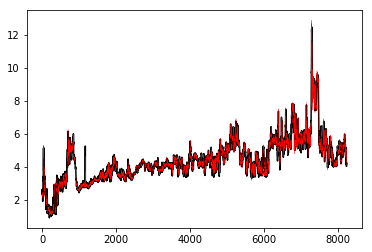

In [0]:
plot2(y,y_pred)

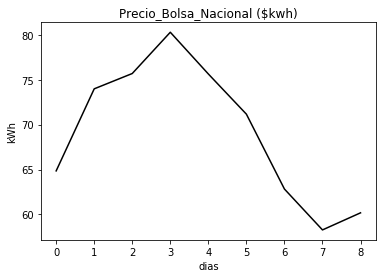

In [0]:
p = np.power((np.array(prediction).reshape(-1, 1)),3)
plot(p[L:])